# Working with Vectrino output

This notebooks is a starter for working with the ASCII output from the Vectrino stored in the .dat files. 

## Loads

In [1]:
# %pylab inline
import numpy as np
from numpy import log, sin, cos, exp, tan, pi
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

%matplotlib inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display, uncomment while working

# uncomment the two lines below when exporting to a pdf
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png','pdf')

## Find the data files and prep for loading the files 

In [2]:
""" --- User input ----------------------------- """

fs = 25 # frequency in Hz that the data was recorded at
h_cm = 8.4 # flow depth in cm

datadir = 'ADV_test/' # path to the data
zfile = 'Z_values.csv'

"""  ------------------------------------------- """

ext = '*.dat'     # data file extension

fig_folder = 'Figures'
# Make the output folder
if os.path.isdir(fig_folder) != 1:
    os.mkdir(fig_folder)

# Specify the column header names in the *.dat files. These names can be found in the .hrd file.

cnames = ['time_s','status','v1_m_s', 'v2_m_s','v3_m_s','v4_m_s','amp1', 'amp2','amp3','amp4',
         'snr1', 'snr2','snr3','snr4','cor1', 'cor2','cor3','cor4']

# Find all of the data files and store the names 

files = sorted(glob.glob(datadir+ext))
nf=len(files)
os.chdir(datadir)
filenames = sorted(glob.glob(ext))
for i in range(0,nf):
    filenames[i]=os.path.splitext(os.path.basename(filenames[i]))[0] #strips extension
os.chdir("..")
    
#strip the endings 

datapt=filenames.copy()
for i in range(0,len(filenames)):
    stname = filenames[i]
    datapt[i]=stname[0:8]
    
# load the z values

zdata = pd.read_csv(datadir+zfile) # reads in the data
# z_h=np.array(zdata.z_cm.copy()/h_cm) # create a scaled z value
# zdata['z_h']=z_h  # add the scaled z value to the dataframe
    
#Print the file names and index value for each file

for i in range(0,nf):
    print('file: ',filenames[i],'(index: ',i,')')

file:  Sample0120220110135739 (index:  0 )
file:  Sample0220220110140125 (index:  1 )
file:  Sample0320220110140425 (index:  2 )
file:  Sample0420220110140710 (index:  3 )
file:  Sample0520220110140934 (index:  4 )
file:  Sample0620220110141151 (index:  5 )
file:  Sample0720220110141456 (index:  6 )
file:  Sample08_up20220110141746 (index:  7 )


In [3]:
datapt

['Sample01',
 'Sample02',
 'Sample03',
 'Sample04',
 'Sample05',
 'Sample06',
 'Sample07',
 'Sample08']

In [4]:
zdata

,z_cm
0,12.0
1,10.8
2,8.8
3,6.8
4,4.8
5,3.8
6,1.6
7,2.6


In [5]:
summary = zdata.copy()
summary

,z_cm
0,12.0
1,10.8
2,8.8
3,6.8
4,4.8
5,3.8
6,1.6
7,2.6


## Look at a single data file

In [6]:
""" --- User input ----------------------------- """
j = 7 # select the file index to look at
"""  ------------------------------------------- """

# read data from a single file into a pandas dataframe

data = pd.read_csv(files[j], sep='\s+', header=None) # reads in the data
data.columns = cnames # renames the columns
data.iloc[:,0]=np.arange(len(data))/fs # changes the counter to time
data=data.drop(['status'], axis=1)  # delete the "status" column
print('number of rows =',len(data))
data.head(5) # display the first five lines of the dataframe

number of rows = 2980


,time_s,v1_m_s,v2_m_s,v3_m_s,v4_m_s,amp1,amp2,amp3,amp4,snr1,snr2,snr3,snr4,cor1,cor2,cor3,cor4
0,0.00,0.479,0.094,0.114,0.0,178,164,171,140,19.4,21.4,17.4,17.3,62,61,68,55
1,0.04,0.380,-0.127,-0.012,0.0,172,164,167,146,19.1,21.4,17.2,17.7,27,85,66,84
2,0.08,0.404,-0.184,-0.071,0.0,178,175,173,149,19.4,21.9,17.5,17.9,81,70,72,65
3,0.12,0.412,-0.073,-0.076,0.0,176,175,179,152,19.3,21.9,17.8,18.1,68,77,77,71
4,0.16,0.263,-0.117,-0.085,0.0,177,168,176,151,19.4,21.6,17.7,18.0,66,56,54,46


mean u velocity [m/s] = 0.38
mean v velocity [m/s] = 0.01
mean w velocity [m/s] = 0.02


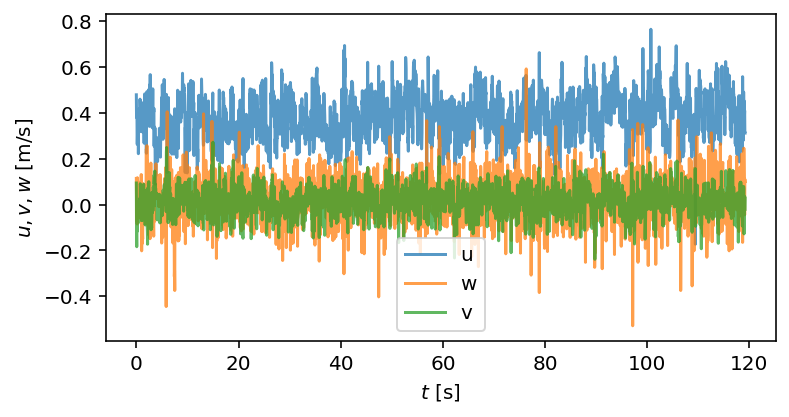

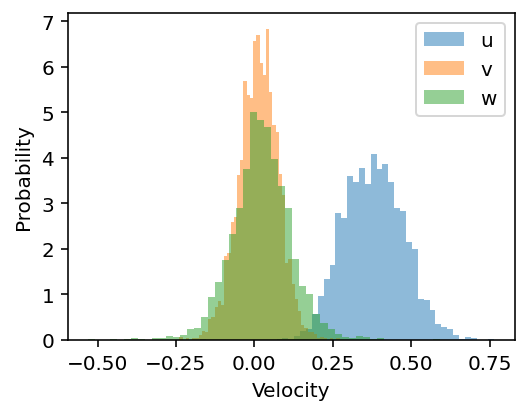

In [7]:
# calculate the means

uavg = data.v1_m_s.mean()
vavg = data.v2_m_s.mean()
wavg = data.v3_m_s.mean()

print('mean u velocity [m/s] =',np.around(uavg,decimals=2))
print('mean v velocity [m/s] =',np.around(vavg,decimals=2))
print('mean w velocity [m/s] =',np.around(wavg,decimals=2))

# plot the velocity time series

# fig, ax = plt.subplots() # don't specify the size
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v1_m_s, alpha=0.75, label='u')
ax.plot(data.time_s,data.v3_m_s,alpha=0.75, label='w')
ax.plot(data.time_s,data.v2_m_s, alpha=0.75,label='v')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u,v,w$ [m/s]')
# ax.set_ylim(-0.25,0.7)
# ax.text(0,-0.2, datapt[j]+' ($z/h =$'+str(np.around(zdata.z_h[j],decimals=2))+')', backgroundcolor='none', clip_on='True', multialignment='center', alpha=1) #weight = 'bold', 
plt.legend(loc='best', ncol=1)
plt.savefig(fig_folder+'/timeseries_'+datapt[j]+'_.pdf',bbox_inches="tight", pad_inches=0.005)

fig, ax = plt.subplots(figsize=(4,3))
plt.hist(data.v1_m_s, 50, density=True, alpha=0.5, label='u')
plt.hist(data.v2_m_s, 50, density=True, alpha=0.5, label='v')
plt.hist(data.v3_m_s, 50, density=True, alpha=0.5, label='w')
plt.xlabel('Velocity')
plt.ylabel('Probability')
plt.legend();

## Filter the data based on SNR and COR values

In [8]:
# filter based on SNR and COR

cf = 70 # correlation filter, drop everything below
snrf = 10
dataf = data[(data.cor1 >= cf)&(data.cor2 >= cf)&(data.cor3 >= cf)&(data.cor3 >= cf)
            &(data.snr1 >= snrf)&(data.snr2 >= snrf)&(data.snr3 >= snrf)&(data.snr4 >= snrf)].copy()
print('number of rows removed =', len(data)-len(dataf))

number of rows removed = 892


## Plot the filtered data

Plot all together and save the output

mean u velocity [m/s] = 0.38
mean v velocity [m/s] = 0.02
mean w velocity [m/s] = 0.02


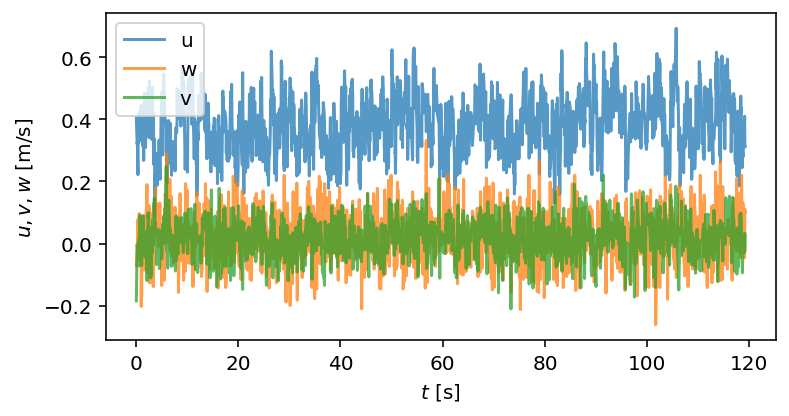

In [9]:
# calculate the means

uavgf = dataf.v1_m_s.mean()
vavgf = dataf.v2_m_s.mean()
wavgf = dataf.v3_m_s.mean()

print('mean u velocity [m/s] =',np.around(uavgf,decimals=2))
print('mean v velocity [m/s] =',np.around(vavgf,decimals=2))
print('mean w velocity [m/s] =',np.around(wavgf,decimals=2))

# fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(dataf.time_s,dataf.v1_m_s, alpha=0.75, label='u')
ax.plot(dataf.time_s,dataf.v3_m_s,alpha=0.75, label='w')
ax.plot(dataf.time_s,dataf.v2_m_s, alpha=0.75,label='v')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u,v,w$ [m/s]')
# ax.set_ylim(-0.25,0.7)
# ax.text(0,-0.2, datapt[j]+' ($z/h =$'+str(np.around(zdata.z_h[j],decimals=2))+')', backgroundcolor='none', clip_on='True', multialignment='center', alpha=1) #weight = 'bold', 
# plt.legend(fontsize=8, frameon=False)
plt.legend(loc='best', ncol=1)
plt.savefig(fig_folder+'/timeseries_filtered_'+datapt[j]+'_.pdf',bbox_inches="tight", pad_inches=0.005)

Compare the filted and unfiltered

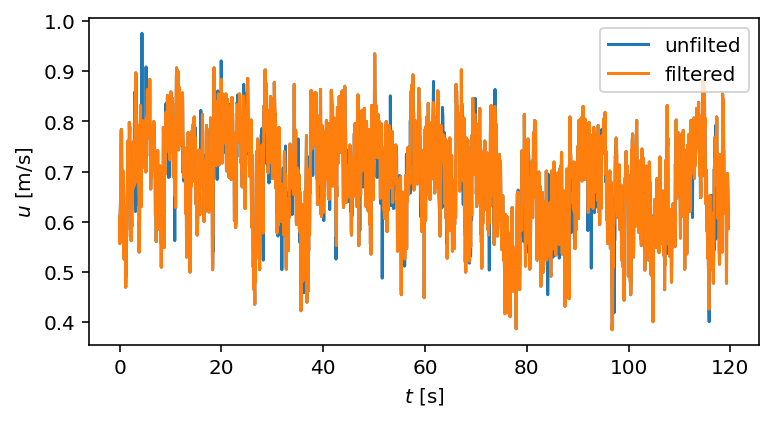

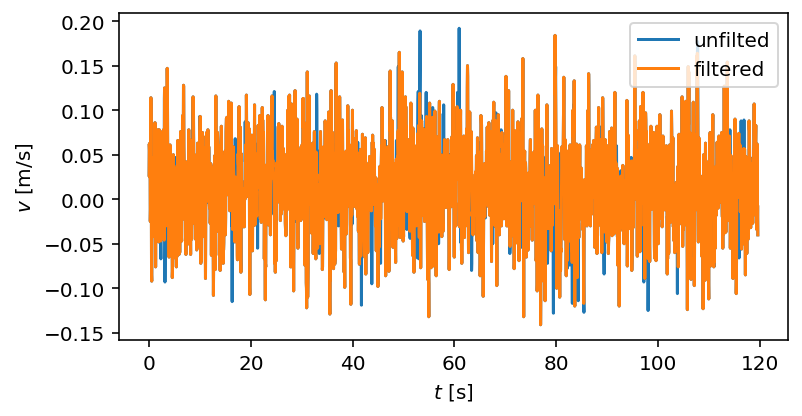

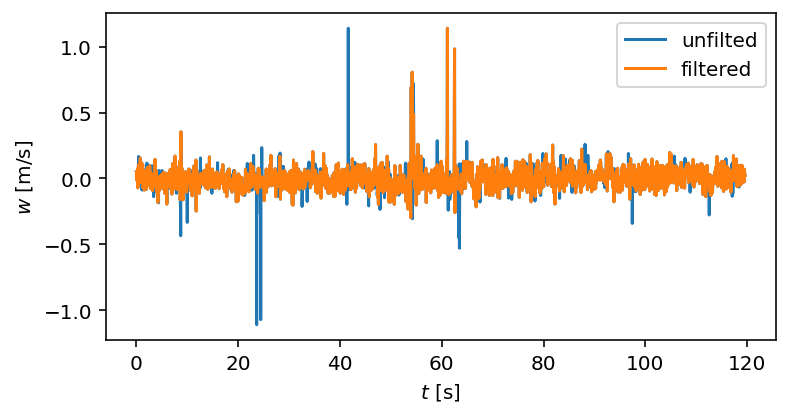

In [23]:
# plot the u filtered and unfiltered
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v1_m_s, alpha=1, label='unfilted')
ax.plot(dataf.time_s,dataf.v1_m_s, alpha=1, label='filtered')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$u$ [m/s]')
plt.legend(loc=1, ncol=1);

# plot the v filtered and unfiltered
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v2_m_s, alpha=1, label='unfilted')
ax.plot(dataf.time_s,dataf.v2_m_s, alpha=1, label='filtered')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$v$ [m/s]')
plt.legend(loc=1, ncol=1);

# plot the w filtered and unfiltered
fig, ax = plt.subplots(figsize=(6,3))
ax.plot(data.time_s,data.v3_m_s, alpha=1, label='unfilted')
ax.plot(dataf.time_s,dataf.v3_m_s, alpha=1, label='filtered')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$w$ [m/s]')
plt.legend(loc=1, ncol=1);

## A few tips


Going between standard numpy arrays and pandas dataframe

In [10]:
# pull a column from the array and work with it as a numpy array rather than as a pandas dataframe column
u_m_s=np.array(dataf.v1_m_s.copy())
u_m_s

array([0.4396, 0.4362, 0.419 , ..., 0.4192, 0.3617, 0.3616])

In [11]:
# tack an array back onto a dataframe
dataf['column_header']=u_m_s  
dataf.head(5)

,time_s,v1_m_s,v2_m_s,v3_m_s,v4_m_s,amp1,amp2,amp3,amp4,snr1,snr2,snr3,snr4,cor1,cor2,cor3,cor4,column_header
0,0.00,0.4396,0.0256,-0.0029,0.0,69,65,80,94,11.2,13.3,10.8,13.9,88,83,90,87,0.4396
1,0.04,0.4362,-0.0007,-0.0591,0.0,83,69,96,98,12.8,13.9,12.4,14.2,94,84,88,86,0.4362
2,0.08,0.4190,0.0071,-0.0523,0.0,78,68,107,97,12.3,13.7,13.4,14.2,91,87,89,86,0.4190
4,0.16,0.4154,-0.0138,-0.0717,0.0,70,52,78,78,11.3,11.4,10.6,12.3,89,75,89,82,0.4154
6,0.24,0.4167,0.0122,0.0045,0.0,96,80,80,98,14.1,15.1,10.8,14.2,87,90,87,92,0.4167
